In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

from lightsout.stochastic.kernel import make_exp_kernel
from lightsout.stochastic.viz import (
    get_deterministic_probs,
    get_entropy,
    get_stochastic_probs,
)

MY_WIDTH = 5.87 * 1.5  # in inches
ratio = 4 / 3  # height/width ratio
MY_HEIGHT = MY_WIDTH / ratio

print(f"Figure size: {MY_WIDTH:.2f} x {MY_HEIGHT:.2f} inches")
# Print in centimeters
print(f"Figure size: {MY_WIDTH * 2.54:.2f} x {MY_HEIGHT * 2.54:.2f} cm")

Figure size: 8.80 x 6.60 inches
Figure size: 22.36 x 16.77 cm


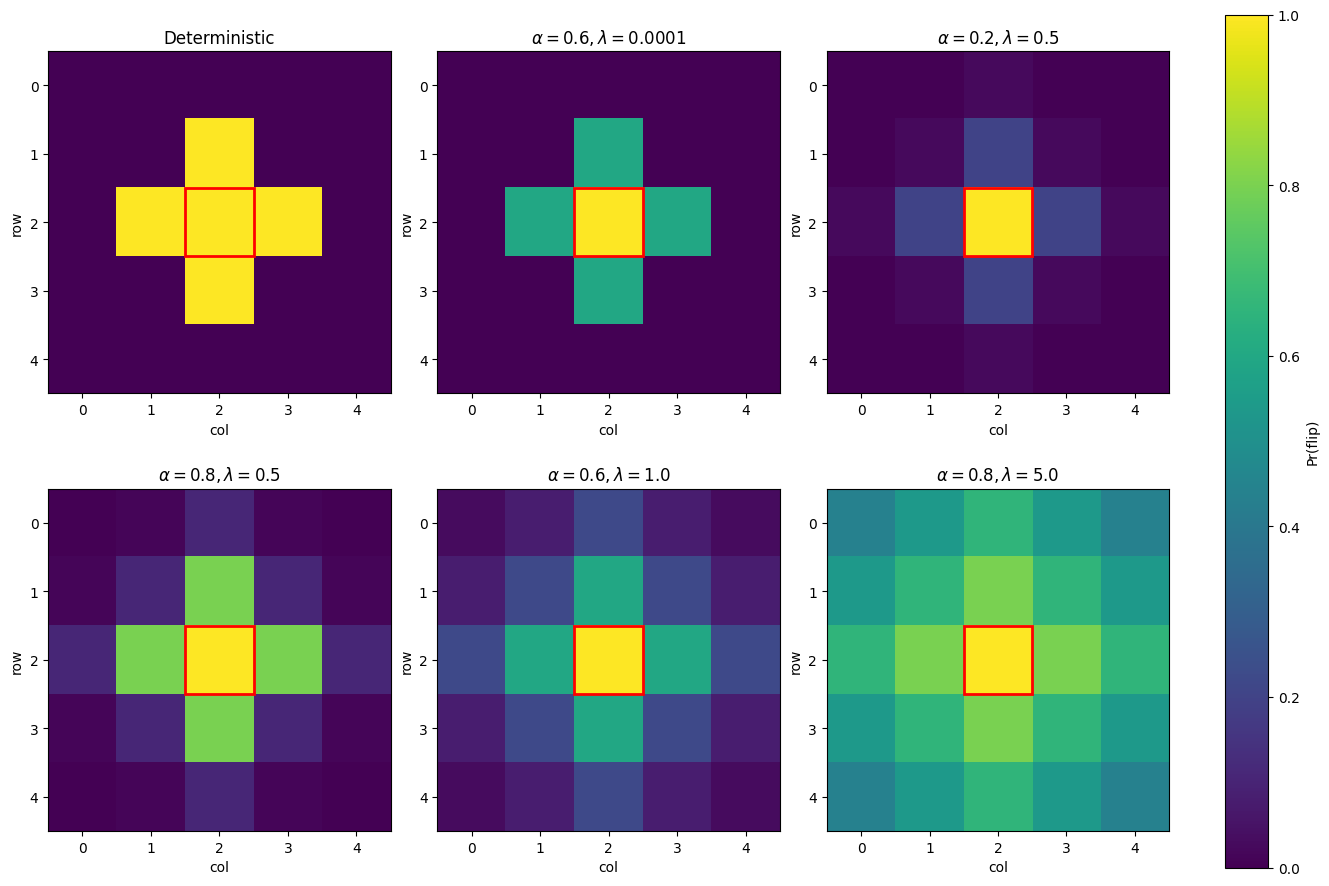

In [3]:
# Board size and action (middle cell)
n = 5
middle_cell = n * n // 2  # For 5x5, this is cell 12

# Create several representative kernels with different alpha-lambda combinations
kernels = [
    make_exp_kernel(n=n, alpha=0.6, lam=0.0001),
    make_exp_kernel(n=n, alpha=0.2, lam=0.5),
    make_exp_kernel(n=n, alpha=0.8, lam=0.5),
    make_exp_kernel(n=n, alpha=0.6, lam=1.0),
    make_exp_kernel(n=n, alpha=0.8, lam=5.0),
]

labels = [
    "Deterministic",
    r"$\alpha=0.6, \lambda=0.0001$",
    r"$\alpha=0.2, \lambda=0.5$",
    r"$\alpha=0.8, \lambda=0.5$",
    r"$\alpha=0.6, \lambda=1.0$",
    r"$\alpha=0.8, \lambda=5.0$",
]

# Prepare data
data_list = [get_deterministic_probs([middle_cell], n)]
for kernel in kernels:
    data_list.append(get_stochastic_probs(kernel, [middle_cell], n))

# Create figure
num_plots = len(data_list)
num_cols = (num_plots + 1) // 2
fig, axes = plt.subplots(
    2, num_cols, figsize=(MY_WIDTH * 1.5, MY_WIDTH), constrained_layout=True
)
axes = axes.flatten()

# Calculate row and column of middle cell
r, c = divmod(middle_cell, n)

images = []
for ax, data, label in zip(axes, data_list, labels):
    images.append(ax.imshow(data, cmap="viridis", vmin=0.0, vmax=1.0))

    # Highlight pressed cell
    ax.add_patch(
        Rectangle(
            (c - 0.5, r - 0.5),
            1,
            1,
            edgecolor="red",
            facecolor="none",
            linewidth=2,
        )
    )

    ax.set(
        xticks=range(n),
        yticks=range(n),
        xlabel="col",
        ylabel="row",
        title=label,
    )

plt.colorbar(images[0], ax=axes, label="Pr(flip)", orientation="vertical")
plt.savefig(
    "../results/plots/stochastic_center_flip_probs.pdf",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

Random cells pressed: [14  0 17  6]


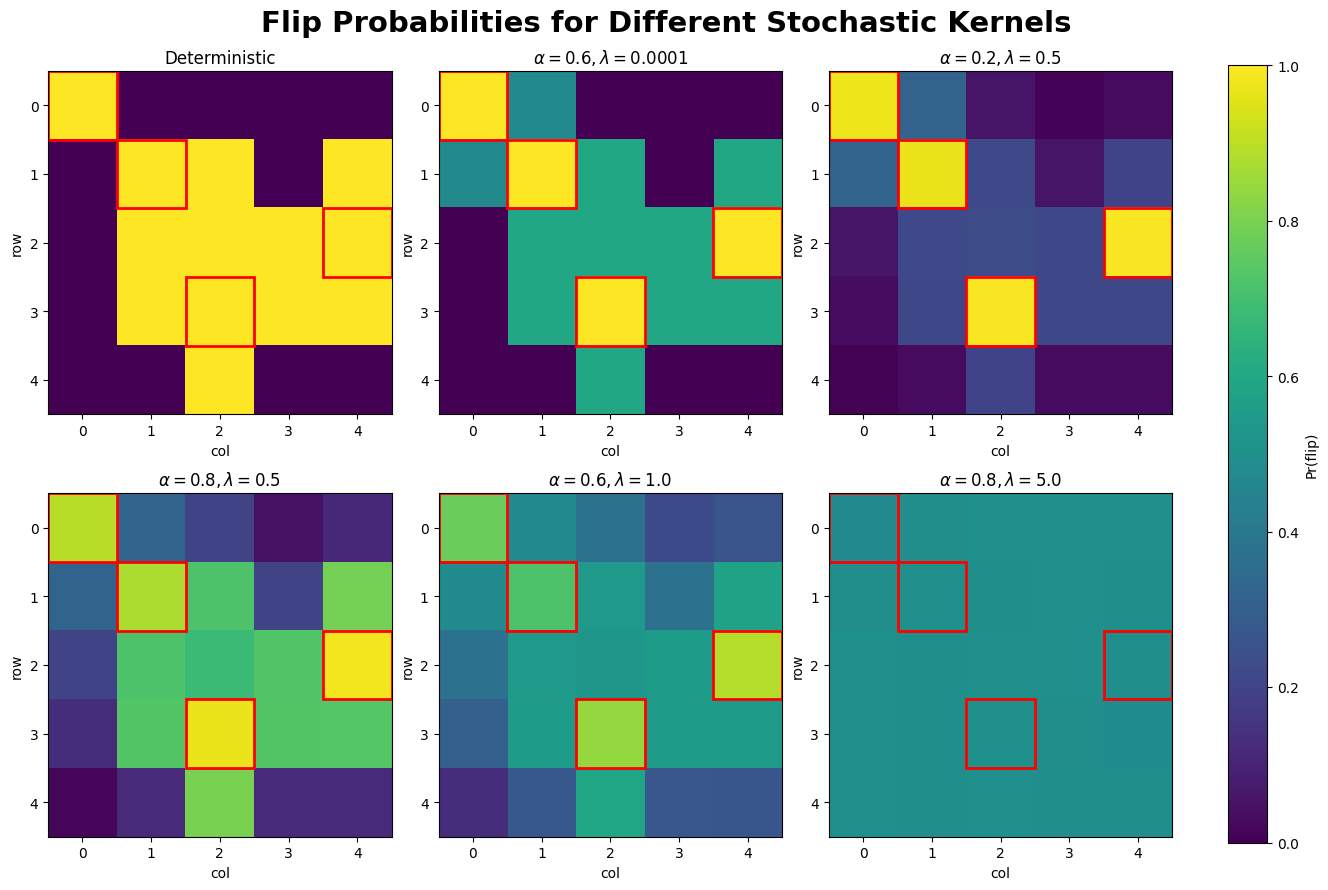

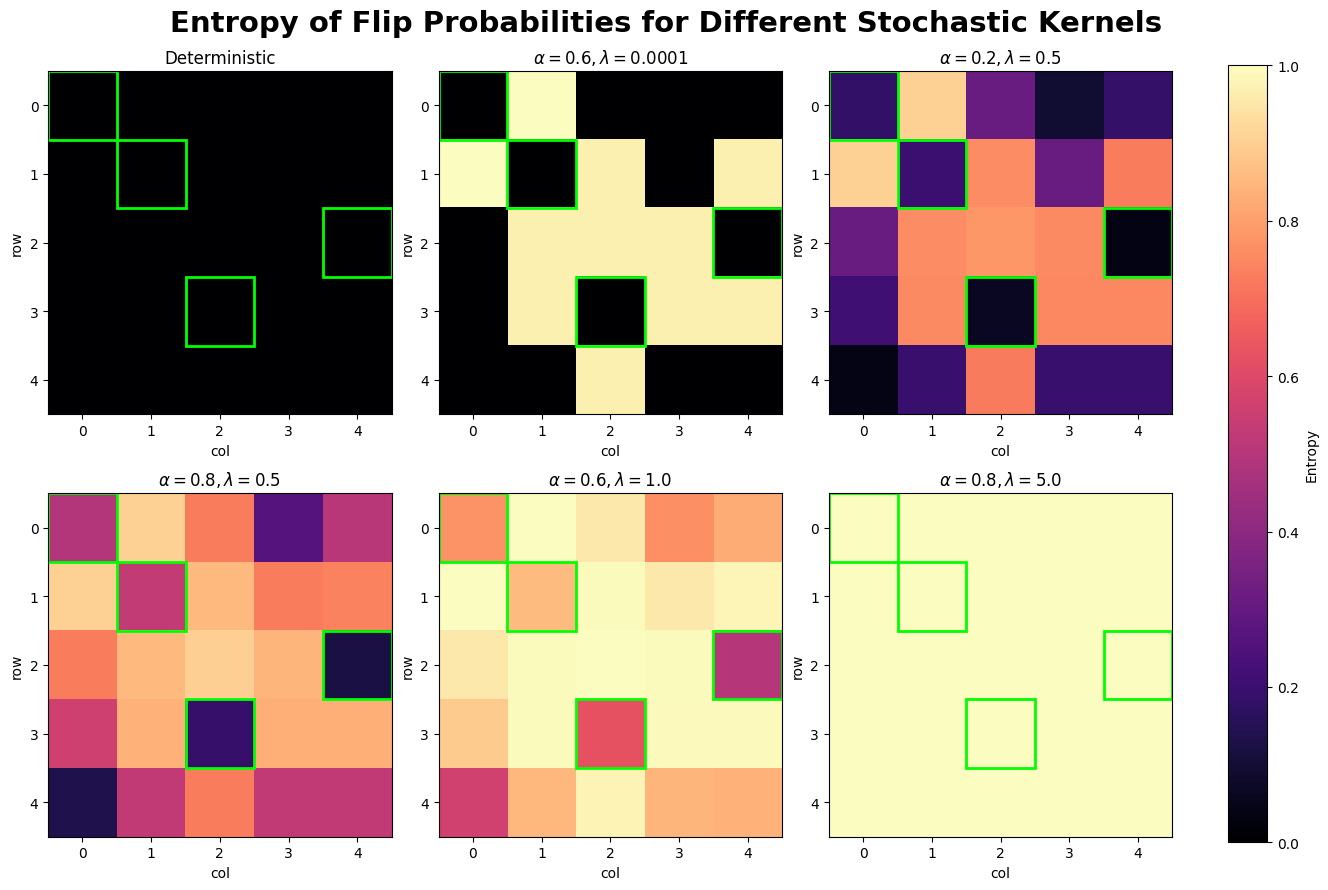

In [4]:
# Generate random actions (cells to press)
np.random.seed(2)
random_actions = np.random.choice(n * n, size=4, replace=False)
print(f"Random cells pressed: {random_actions}")


# Prepare data
prob_data_list = [get_deterministic_probs(random_actions, n)]
entropy_data_list = [get_entropy(prob_data_list[0])]

for kernel in kernels:
    probs = get_stochastic_probs(kernel, random_actions, n)
    prob_data_list.append(probs)
    entropy_data_list.append(get_entropy(probs))

# Create figure
num_plots = len(prob_data_list)
num_cols = (num_plots + 1) // 2
fig, axes = plt.subplots(
    2, num_cols, figsize=(MY_WIDTH * 1.5, MY_WIDTH), constrained_layout=True
)
axes = axes.flatten()

images = []
for ax, prob_data, label in zip(axes, prob_data_list, labels):
    images.append(ax.imshow(prob_data, cmap="viridis", vmin=0.0, vmax=1.0))

    # Highlight pressed cells
    for action in random_actions:
        r, c = divmod(action, n)
        ax.add_patch(
            Rectangle(
                (c - 0.5, r - 0.5),
                1,
                1,
                edgecolor="red",
                facecolor="none",
                linewidth=2,
            )
        )

    ax.set(
        xticks=range(n),
        yticks=range(n),
        xlabel="col",
        ylabel="row",
        title=label,
    )

plt.colorbar(images[0], ax=axes, label="Pr(flip)", orientation="vertical")
plt.suptitle(
    "Flip Probabilities for Different Stochastic Kernels",
    fontsize=14 * 1.5,
    fontweight="bold",
)
plt.savefig(
    "../results/plots/stochastic_random_flip_probs.pdf",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

fig, axes = plt.subplots(
    2, num_cols, figsize=(MY_WIDTH * 1.5, MY_WIDTH), constrained_layout=True
)
axes = axes.flatten()

images = []
for ax, entropy_data, label in zip(axes, entropy_data_list, labels):
    images.append(ax.imshow(entropy_data, cmap="magma", vmin=0, vmax=1))

    # Highlight pressed cells
    for action in random_actions:
        r, c = divmod(action, n)
        ax.add_patch(
            Rectangle(
                (c - 0.5, r - 0.5),
                1,
                1,
                edgecolor="lime",
                facecolor="none",
                linewidth=2,
            )
        )

    ax.set(
        xticks=range(n),
        yticks=range(n),
        xlabel="col",
        ylabel="row",
        title=label,
    )

plt.colorbar(images[0], ax=axes, label="Entropy", orientation="vertical")
plt.suptitle(
    "Entropy of Flip Probabilities for Different Stochastic Kernels",
    fontsize=14 * 1.5,
    fontweight="bold",
)
plt.savefig(
    "../results/plots/stochastic_random_entropy.pdf",
    dpi=300,
    bbox_inches="tight",
)
plt.show()